In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

In [ ]:
pd.options.plotting.backend='hvplot'#to hvplot

In [ ]:
#importing dataset
telco=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head(5)

In [ ]:
telco.isnull().sum()

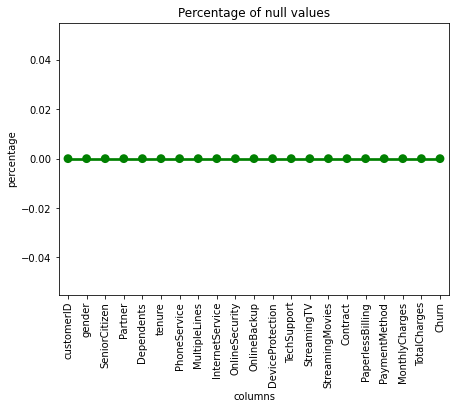

In [ ]:
#ploting the null percentage
null=pd.DataFrame((telco.isnull().sum())*100/telco.shape[0]).reset_index()#shape[0] is no.of rows
plt.figure(figsize=(7,5))
ax=sns.pointplot('index',0,data=null,color='green')#pointplot estimate the central tendency of variables
plt.title('Percentage of null values')
plt.xticks(rotation=90)
plt.xlabel('columns')
plt.ylabel('percentage')
plt.show()

Percentage of null values is zero.

In [ ]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
telco.shape

(7043, 21)

In [ ]:
telco.dtypes

In [ ]:
telco.describe()

Maximum tenure period customer have is 72 months.
seniorcitizen didn't have proper distribution beacause it is actually categorical.
Average monthly charges customer spend is 64 dollars.

In [ ]:
telco.info()

Text(0.5, 1.0, 'count of per target variable')

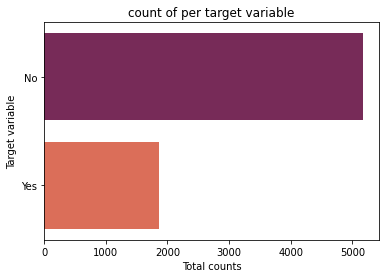

In [ ]:
#checking the value count of target variable
sns.countplot(y='Churn',data=telco,palette='rocket')
#telco['Churn'].value_counts().plot(kind='barh',figsize=(10,10),color='g')
plt.xlabel('Total counts')
plt.ylabel('Target variable')
plt.title('count of per target variable')

In [ ]:
telco['Churn'].value_counts()*100/len(telco['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced(No-73% & Yes-27%).So we have to do imbalanced learning to make even ratio to avoid bias.

#Data cleaning

coverting datatype

In [ ]:
#creating copy of base data
telco_data=telco.copy()
telco_data.head(5)

In [4]:
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce')#change datatype

In [5]:
telco_data['TotalCharges'].dtypes
telco_data['TotalCharges'].isnull().sum()

11

In [ ]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

Totalcharges shows no null when object datatype beacause of nan.when converted to num it shows null.

In [6]:
#filling null values
telco_data['TotalCharges']=telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].mean())
telco_data['TotalCharges'].isnull().sum()

0

In [ ]:
telco_data['tenure'].max()#maximum tenure period

72

Maximum tenure period is 72.

In [7]:
#creating new feature
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
telco_data['Tenure_period']=pd.cut(telco_data.tenure,range(1,79,12),right=False,labels=labels)

In [8]:
telco_data['Tenure_period'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_period, dtype: int64

2175 customers are between 1-12 tenure period.

In [9]:
#deleting unwanted columns
telco_data.drop(columns=['customerID'],axis=1,inplace=True)
telco_data.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn Tenure_period  
0  Electronic check          29.85         29.85     No        1 - 12  
1      Mailed check          56.95       1889.50     No       25 - 36  
2      Mailed check          53.85        108.15    Yes        1 - 12  

[3 rows x 21 columns]

In [ ]:
#detecting outlier
telco_data['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
telco_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

No outlier detected.

#EDA

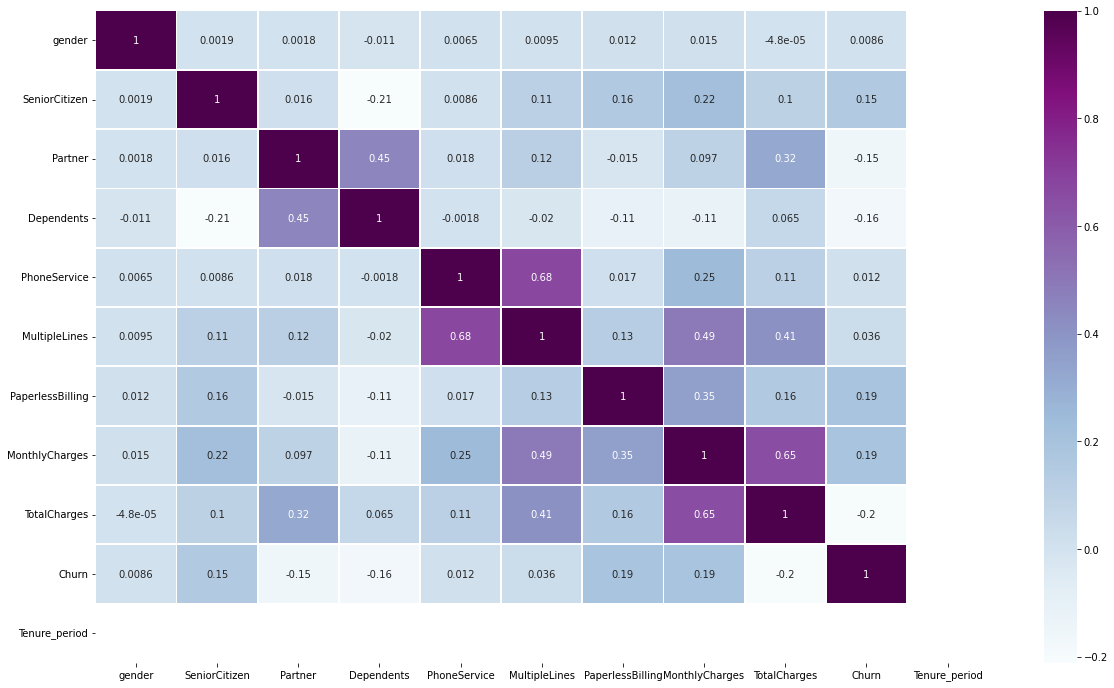

In [ ]:
#Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(telco_data.corr(),annot=True,cbar=True,linewidths=0.8,cmap='BuPu')

*   column that closer to value 1 has strong linear relationship.
*   co-relation only measure linear relationship in data.
*   It doesn't measure non-linear relationship.
*   so we don't delete features based on co-relation for other than linear relationships.


Distribution of features Continuous

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
continuous=telco_data.dtypes[telco_data.dtypes!='O'].index
continuous

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Tenure_period'], dtype='object')

In [ ]:
telco_data.plot(kind='scatter',x="MonthlyCharges",y="TotalCharges",c='Churn')

:Scatter   [MonthlyCharges]   (TotalCharges,Churn)

Here we can display the value of monthly charge and total charge by churn.

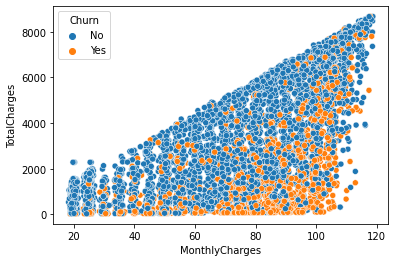

In [ ]:
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data=telco_data,hue="Churn")

*   If monthly charge increases churning rate also increases.Most of the churning customers lies between 0-2000 Totalcharges.
*   If total cahrges increases monthly charge also increases.Co-relation occurs.
*   Co-relation occurs between monthlycharge and total charge.

Text(0.5, 1.0, 'Totalcharges by churn')

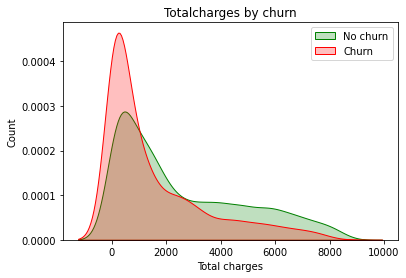

In [ ]:
Total=sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']==0)],color='g',shade=True)
sns.kdeplot(telco_data.TotalCharges[(telco_data['Churn']==1)],ax=Total,color='r',shade=True)
plt.legend(["No churn","Churn"],loc="upper right")
plt.ylabel('Count')
plt.xlabel('Total charges')
plt.title('Totalcharges by churn')

When total charge is low churning rate is high.Here,we see if customer pay high amount of monthly charge in low tenure is leeds to lower total charges.

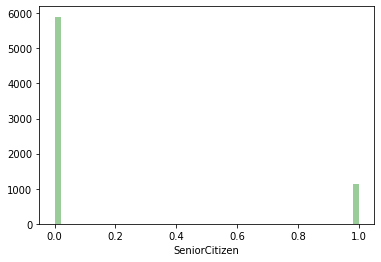

In [ ]:
sns.distplot(telco_data.SeniorCitizen,color='g',kde=False)

Majority of senior citizen is 0(No).

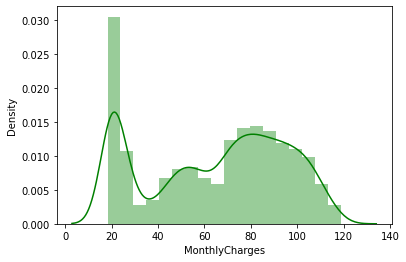

In [ ]:
sns.distplot(telco_data.MonthlyCharges,color='g')

Not follow uniform distribution.

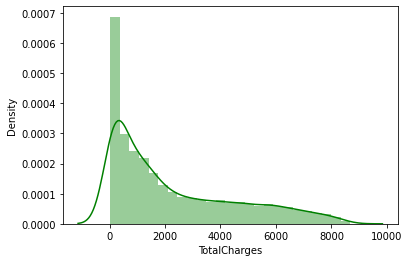

In [ ]:
sns.distplot(telco_data.TotalCharges,color='g')

Skew in data.Not follow uniform distribution.

#Distribution of features CATEGORICAL

In [ ]:
cat=[ x for x in telco_data.columns if telco_data[x].dtypes=='O']
cat

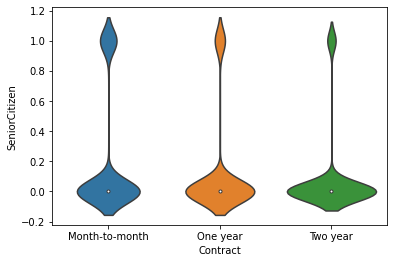

In [ ]:
ax=sns.violinplot(x="Contract",y="SeniorCitizen",data=telco_data)

Most of the contract customers are Non-seniorcitizen.

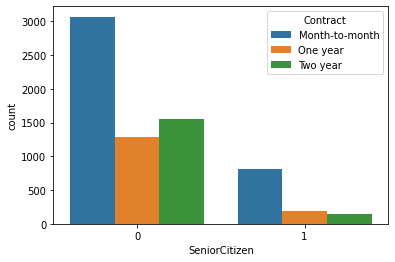

In [ ]:
sns.countplot(x="SeniorCitizen",data=telco_data,hue='Contract')

Clearly shows most of the non-senior citizens are monthly contractors and they have more likely to churn because they are free to go.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

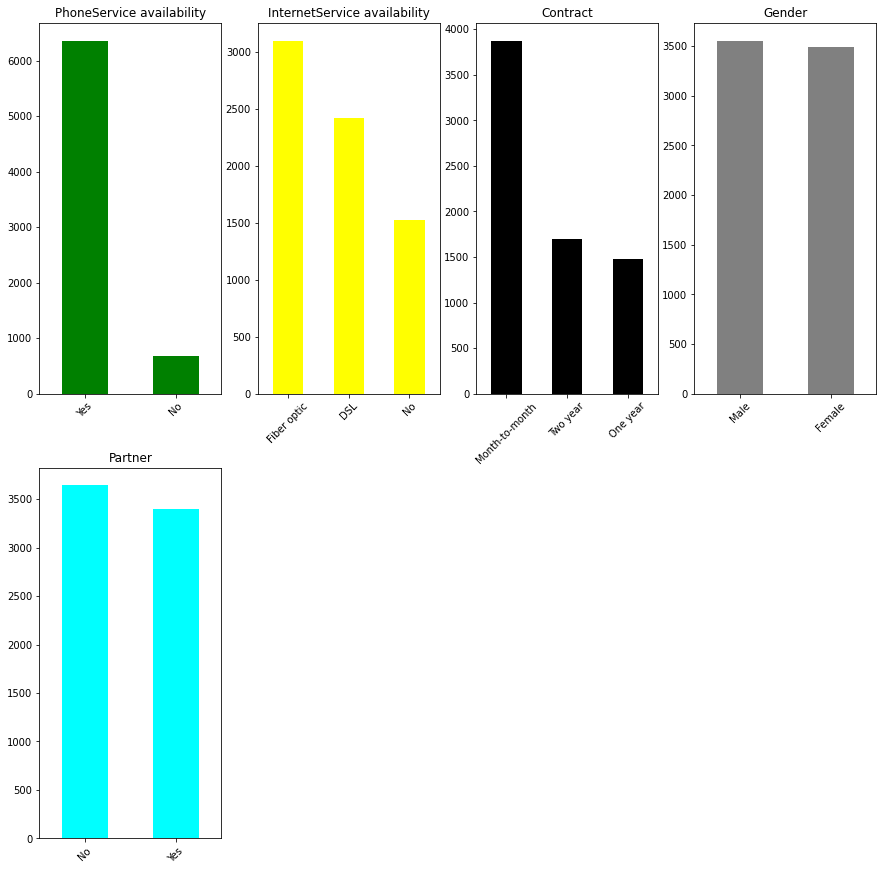

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(241)
plt.title("PhoneService availability")
telco_data.PhoneService.value_counts().plot(kind='bar',color='g')
plt.xticks(rotation=45)

plt.subplot(242)
plt.title("InternetService availability")
telco_data.InternetService.value_counts().plot(kind='bar',color='yellow')
plt.xticks(rotation=45)

plt.subplot(243)
plt.title("Contract")
telco_data.Contract.value_counts().plot(kind='bar',color='black')
plt.xticks(rotation=45)

plt.xticks(rotation=45)
plt.savefig('hospital.png')

plt.subplot(245)
plt.title("Partner")
telco_data.Partner.value_counts().plot(kind='bar',color='cyan')
plt.xticks(rotation=45)



*   Most of the customers have phone service.
*   customers prefer month-to-month contract than year contract.
*   Most people prefer fiber optic internet service.
*   Male customers are higher than female customers.






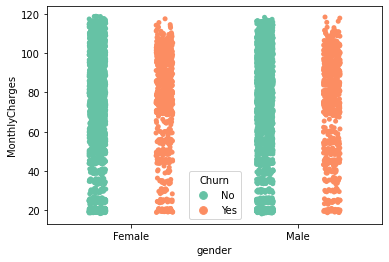

In [ ]:
ax=sns.stripplot(x="gender",y="MonthlyCharges",hue="Churn",data=telco_data,palette="Set2",dodge=True)

*   Females are highly monthly charge customers.



#Feature Vs Target 

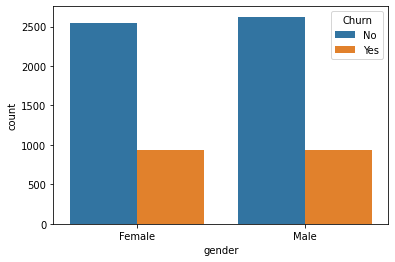

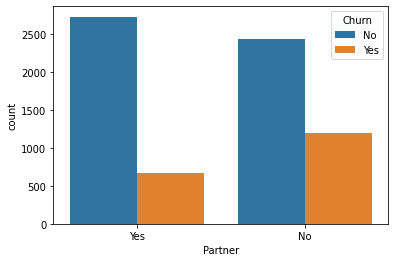

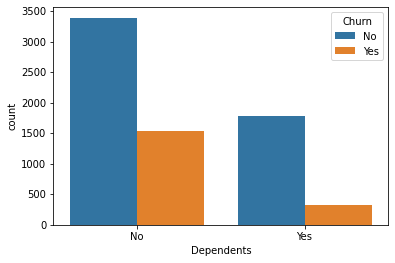

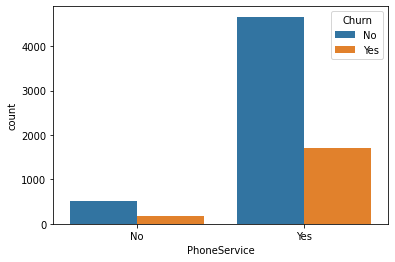

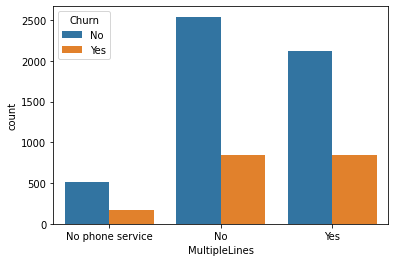

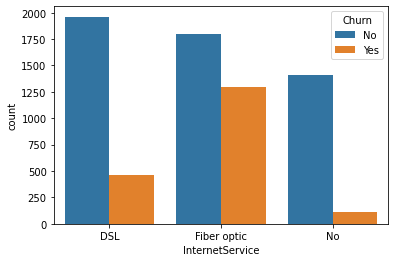

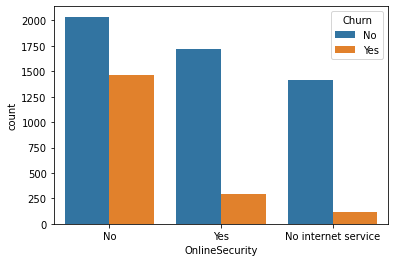

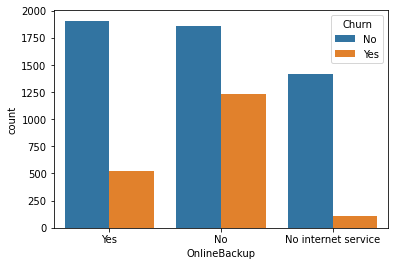

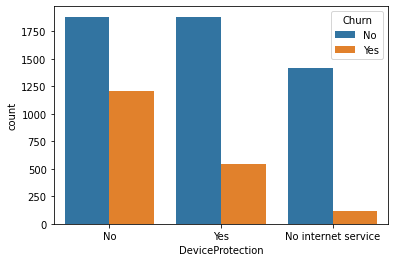

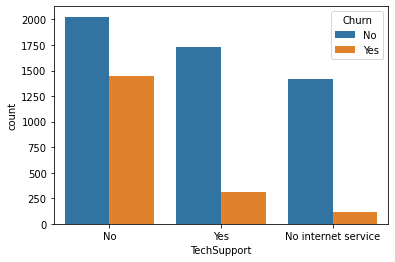

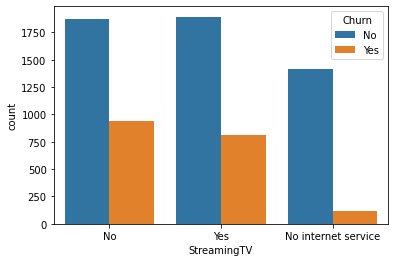

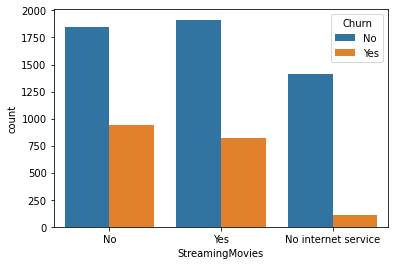

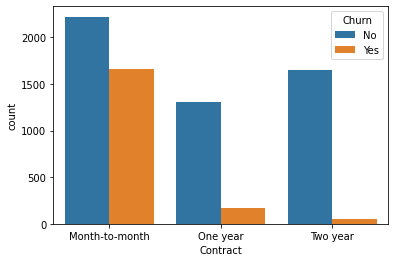

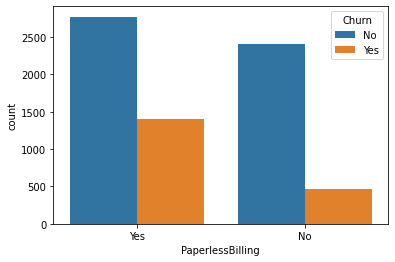

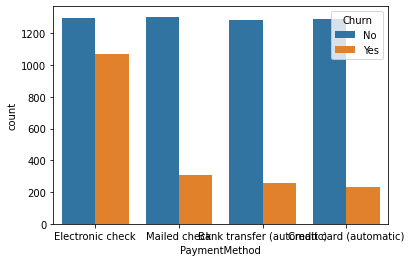

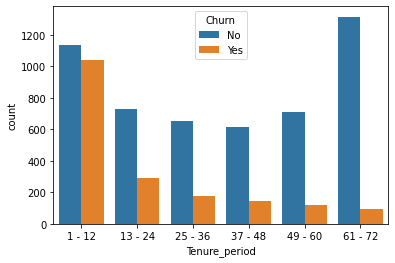

In [ ]:
for i ,cat in enumerate(telco_data.drop(columns=["Churn","MonthlyCharges","SeniorCitizen","TotalCharges"])):
  plt.figure(i)
  sns.countplot(data=telco_data,x=cat,hue="Churn")

Distribution of churn with categorical features.

In [10]:
telco_data['Churn']=telco_data['Churn'].map({'Yes':1,'No':0})

Text(0.5, 1.0, 'TechSupport Vs churn')

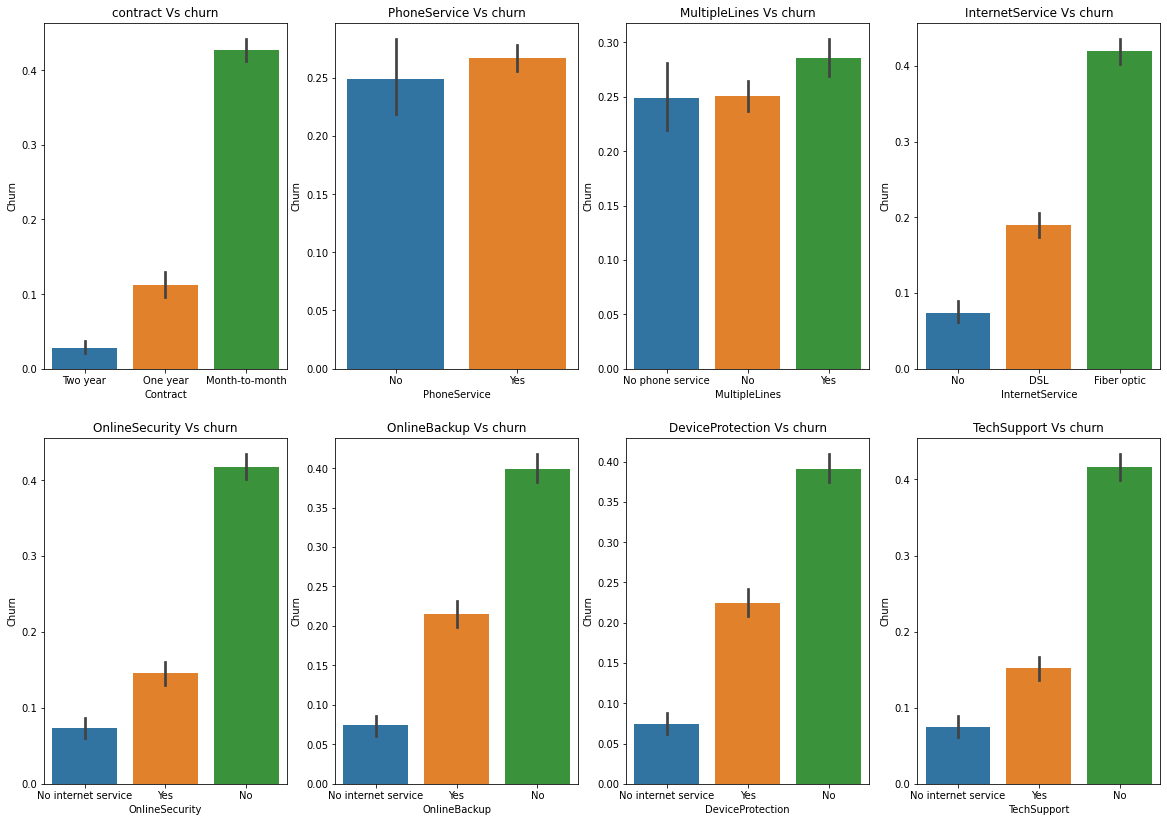

In [ ]:
plt.figure(figsize=(20,14))
plt.subplot(241)
sns.barplot(x=telco_data['Contract'],y=telco_data['Churn'],order=telco_data.groupby('Contract')['Churn'].mean().reset_index().sort_values('Churn')['Contract'])
plt.title("contract Vs churn")

plt.subplot(242)
sns.barplot(x=telco_data['PhoneService'],y=telco_data['Churn'],order=telco_data.groupby('PhoneService')['Churn'].mean().reset_index().sort_values('Churn')['PhoneService'])
plt.title("PhoneService Vs churn")

plt.subplot(243)
sns.barplot(x=telco_data['MultipleLines'],y=telco_data['Churn'],order=telco_data.groupby('MultipleLines')['Churn'].mean().reset_index().sort_values('Churn')['MultipleLines'])
plt.title("MultipleLines Vs churn")

plt.subplot(244)
sns.barplot(x=telco_data['InternetService'],y=telco_data['Churn'],order=telco_data.groupby('InternetService')['Churn'].mean().reset_index().sort_values('Churn')['InternetService'])
plt.title("InternetService Vs churn")

plt.subplot(245)
sns.barplot(x=telco_data['OnlineSecurity'],y=telco_data['Churn'],order=telco_data.groupby('OnlineSecurity')['Churn'].mean().reset_index().sort_values('Churn')['OnlineSecurity'])
plt.title("OnlineSecurity Vs churn")

plt.subplot(246)
sns.barplot(x=telco_data['OnlineBackup'],y=telco_data['Churn'],order=telco_data.groupby('OnlineBackup')['Churn'].mean().reset_index().sort_values('Churn')['OnlineBackup'])
plt.title("OnlineBackup Vs churn")

plt.subplot(247)
sns.barplot(x=telco_data['DeviceProtection'],y=telco_data['Churn'],order=telco_data.groupby('DeviceProtection')['Churn'].mean().reset_index().sort_values('Churn')['DeviceProtection'])
plt.title("DeviceProtection Vs churn")

plt.subplot(248)
sns.barplot(x=telco_data['TechSupport'],y=telco_data['Churn'],order=telco_data.groupby('TechSupport')['Churn'].mean().reset_index().sort_values('Churn')['TechSupport'])
plt.title("TechSupport Vs churn")

*   PhoneService follows linear relationship with churn.
*   MultipleLines follows slight linear relationship.
*   Contract not follow linear relationship,distribution of month contract rapidly rise from other.
*   InternetService has no linear distribution .so we do one hot encoding.when fiber optic customers increases churning rate also increases.






Text(0.5, 1.0, 'PaymentMethod Vs churn')

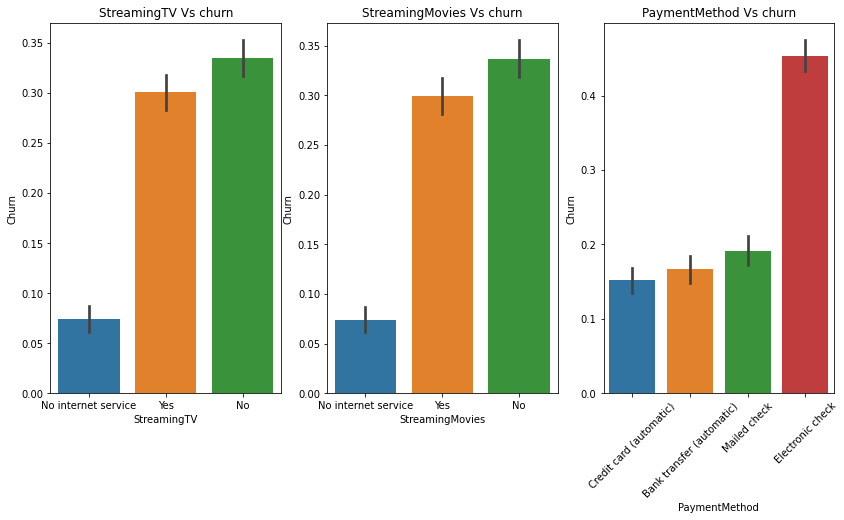

In [ ]:
plt.figure(figsize=(19,15))
plt.subplot(241)
sns.barplot(x=telco_data['StreamingTV'],y=telco_data['Churn'],order=telco_data.groupby('StreamingTV')['Churn'].mean().reset_index().sort_values('Churn')['StreamingTV'])
plt.title("StreamingTV Vs churn")

plt.subplot(242)
sns.barplot(x=telco_data['StreamingMovies'],y=telco_data['Churn'],order=telco_data.groupby('StreamingMovies')['Churn'].mean().reset_index().sort_values('Churn')['StreamingMovies'])
plt.title("StreamingMovies Vs churn")

plt.subplot(243)
sns.barplot(x=telco_data['PaymentMethod'],y=telco_data['Churn'],order=telco_data.groupby('PaymentMethod')['Churn'].mean().reset_index().sort_values('Churn')['PaymentMethod'])
plt.xticks(rotation=45)
plt.title("PaymentMethod Vs churn")

*   customers having no internet facility has low churning rate.
*   customers having Electronic check as their payment method has more ratio to churning to other.
*   customers who don't stream movies are highly churners.




#Label encoding

In [ ]:
telco_data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [11]:
telco_data['gender']=telco_data['gender'].map({'Female':1,'Male':0})
telco_data['Partner']=telco_data['Partner'].map({'Yes':1,'No':0})
telco_data['Dependents']=telco_data['Dependents'].map({'Yes':1,'No':0})
telco_data['PhoneService']=telco_data['PhoneService'].map({'Yes':1,'No':0})
telco_data['PaperlessBilling']=telco_data['PaperlessBilling'].map({'Yes':1,'No':0})
telco_data['MultipleLines']=telco_data['MultipleLines'].map({'No phone service':0,'No':1,'Yes':2})

In [ ]:
telco_data

#one hot encoding

In [ ]:
#telco_data['Tenure_period']=pd.to_numeric(telco_data['Tenure_period'],errors='coerce')

In [ ]:
telco_data_new=pd.get_dummies(telco_data)
telco_data_new

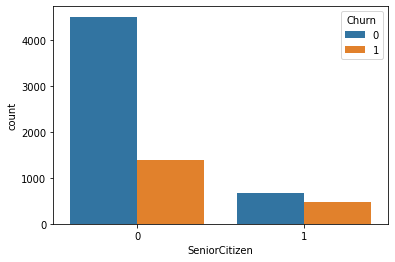

In [ ]:
ax=sns.countplot(x="SeniorCitizen",data=telco_data_new,hue='Churn')

Non senior citizens are more likely churn.

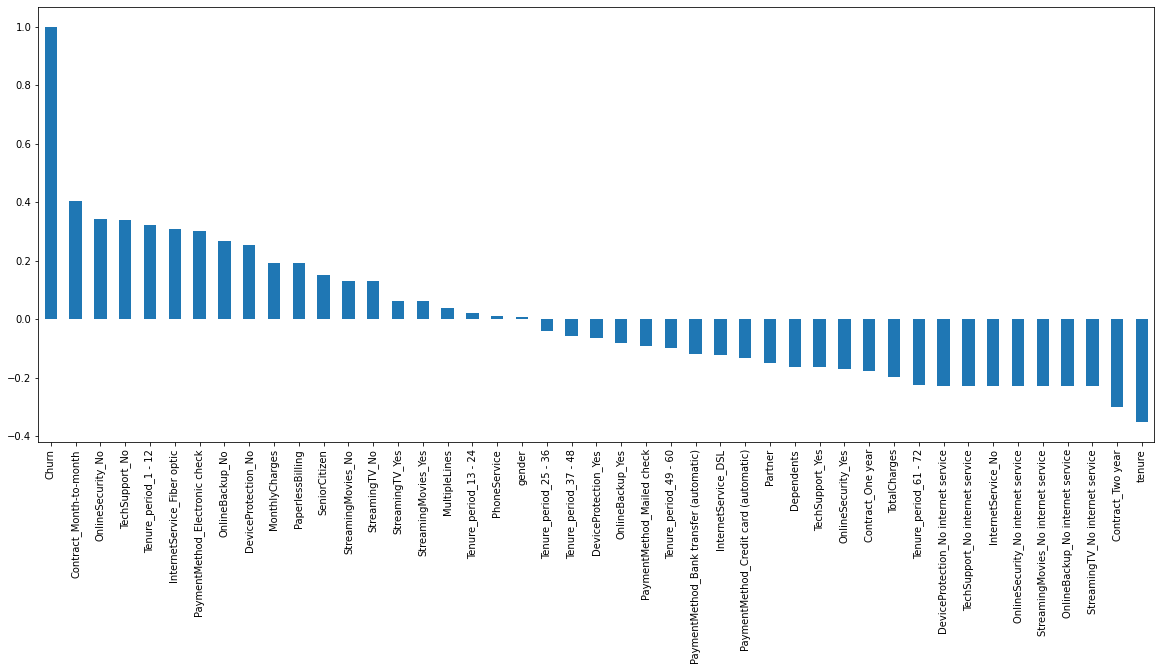

In [ ]:
plt.figure(figsize=(20,8))
telco_data_new.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

*  Gender,phoneservices and multiple lines have no impact on churn factor.
*  contract for 2 years has very low co-relation to churn.
*  customer with **no internet services** seems like to be have very low churn.
*  High churn factors are **month contract,electronic payment,no tech support,no online security**.
*   Monthly contract customers are more likely to churn due to low time contract terms.







In [ ]:
telco_data_new.to_csv('Telecom_customer_churn.csv')

#ML Model

*  We know that our data highly imbalanced dataset.Majority(70%)nof the data belongs to one class.
    > churning customers are--No(73%) & yes(23%)
*   So we have to do imbalanced learning to avoid skew.

In [ ]:
!pip install imblearn

In [47]:
x=telco_data_new.drop(["Churn","tenure"],axis='columns')
y=telco_data_new['Churn']

In [48]:
import imblearn
from imblearn.combine import SMOTETomek

In [49]:
smote=SMOTETomek(sampling_strategy='all')
x_sm,y_sm=smote.fit_resample(x,y)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.25,random_state=0) #splitting

In [52]:
x_train.shape,x_test.shape

((7123, 43), (2375, 43))

In [53]:
from sklearn.preprocessing import StandardScaler #scaling
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
X_train = scaler.transform(x_train) 
X_test = scaler.transform(x_test)

In [ ]:
X_train.shape,X_test.shape

Logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train) #fit model

In [40]:
y_pred=lr.predict(X_test) 
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
lr.predict_proba(X_test)

array([[0.93779256, 0.06220744],
       [0.94311346, 0.05688654],
       [0.84495196, 0.15504804],
       ...,
       [0.00199111, 0.99800889],
       [0.99511472, 0.00488528],
       [0.78195533, 0.21804467]])

In [42]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,roc_curve,confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


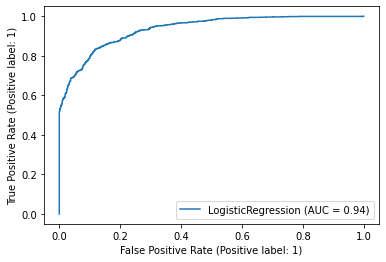

In [43]:
#confusion_matrix(y_test,y_pred)
plot_roc_curve(lr,X_test,y_test)

In [44]:
acc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
print("Test set auc: {:.2f}".format(acc))

Test set auc: 0.94


AUCROC score is 0.94.Good model.

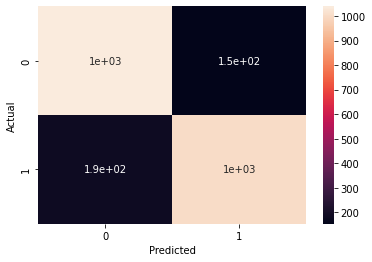

In [ ]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

KNN-K Nearest Neighbour

In [ ]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) 
  knn.fit(X_train,y_train) 
  print("K value  : " , i," Train Accuracy : ", knn.score(X_train,y_train), " score : ", np.mean(cross_val_score(knn,X_train,y_train,cv=10)))

K value  :  1  Train Accuracy :  0.998314606741573  score :  0.8115168539325843
K value  :  2  Train Accuracy :  0.9155898876404495  score :  0.8146067415730338
K value  :  3  Train Accuracy :  0.9077247191011236  score :  0.8314606741573034
K value  :  4  Train Accuracy :  0.8974719101123596  score :  0.8290730337078651
K value  :  5  Train Accuracy :  0.8887640449438202  score :  0.8337078651685393
K value  :  6  Train Accuracy :  0.885252808988764  score :  0.8358146067415729
K value  :  7  Train Accuracy :  0.8789325842696629  score :  0.8386235955056179
K value  :  8  Train Accuracy :  0.8814606741573033  score :  0.839185393258427
K value  :  9  Train Accuracy :  0.8709269662921348  score :  0.8403089887640449
K value  :  10  Train Accuracy :  0.8741573033707866  score :  0.8456460674157305
K value  :  20  Train Accuracy :  0.8536516853932584  score :  0.839747191011236
K value  :  50  Train Accuracy :  0.8318820224719101  score :  0.8234550561797753


k=10 has the highest cross validation score.Training accuracy doesn't make any sense.

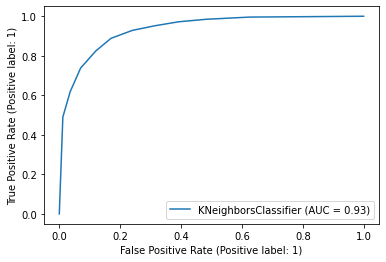

In [ ]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
plot_roc_curve(knn,X_test,y_test)

In [ ]:
#prediction
knn_pred=knn.predict(X_test) 
knn_pred

array([0, 0, 0, ..., 0, 0, 1])

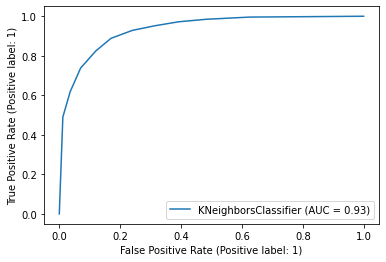

In [ ]:
#evaluation
plot_roc_curve(knn,X_test,y_test)

In [ ]:
acc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
print("Test set auc: {:.2f}".format(acc))

Test set auc: 0.93


AUROC score is 0.93.Good model.

Decision tree

In [ ]:
dtt= DecisionTreeClassifier()
dtt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

DecisionTreeClassifier()

In [ ]:
dtt_pred=dtt.predict(X_test)
dtt_pred

array([0, 0, 1, ..., 0, 0, 1])

But for decision tree we have to set DEPTH parameter to reduce overfitting if we don't it will grow without limit that leads to overfit.

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) #set depth threshold to reduce overfit
  dt.fit(X_train, y_train) #training
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) #useless information
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt,X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10 or 5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7220505617977528  Cross val score :  0.7220505617977528
Depth  :  2  Training Accuracy :  0.7220505617977528  Cross val score :  0.7220505617977528
Depth  :  3  Training Accuracy :  0.8016853932584269  Cross val score :  0.7992977528089888
Depth  :  4  Training Accuracy :  0.8189606741573033  Cross val score :  0.8174157303370787
Depth  :  5  Training Accuracy :  0.8324438202247191  Cross val score :  0.8203651685393257
Depth  :  6  Training Accuracy :  0.8476123595505618  Cross val score :  0.8308988764044944
Depth  :  7  Training Accuracy :  0.8584269662921349  Cross val score :  0.8331460674157304
Depth  :  8  Training Accuracy :  0.876123595505618  Cross val score :  0.8314606741573034
Depth  :  9  Training Accuracy :  0.8935393258426966  Cross val score :  0.8355337078651687
Depth  :  10  Training Accuracy :  0.9120786516853933  Cross val score :  0.8301966292134833
Depth  :  20  Training Accuracy :  0.9945224719101123  Cross val score :  0.8188

Depth parameter is 9.

In [ ]:
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 1])

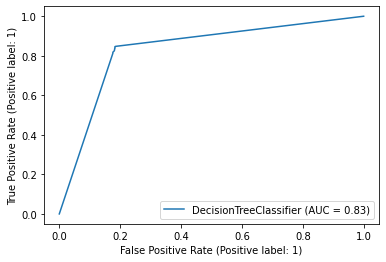

In [ ]:
plot_roc_curve(dt,X_test,y_test)

In [ ]:
dt_acc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("Test set auc decision tree: {:.2f}".format(dt_acc))

Test set auc decision tree: 0.83


0.83 is a good model.

[(0.013665299549205022, 'gender'),
 (0.010515479694821658, 'SeniorCitizen'),
 (0.013905858800165429, 'Partner'),
 (0.018720154329909384, 'Dependents'),
 (0.006175449855210183, 'PhoneService'),
 (0.009313914433778409, 'MultipleLines'),
 (0.016998386129458583, 'PaperlessBilling'),
 (0.12386678483029372, 'MonthlyCharges'),
 (0.19305955233571825, 'TotalCharges'),
 (0.01249112431278094, 'InternetService_DSL'),
 (0.04456479362359265, 'InternetService_Fiber optic'),
 (0.00028535198809420887, 'InternetService_No'),
 (0.007415008185466393, 'OnlineSecurity_No'),
 (0.0, 'OnlineSecurity_No internet service'),
 (0.02084823175094355, 'OnlineSecurity_Yes'),
 (0.009231820601141394, 'OnlineBackup_No'),
 (0.0003852251839271819, 'OnlineBackup_No internet service'),
 (0.010834101555235412, 'OnlineBackup_Yes'),
 (0.007626411562383056, 'DeviceProtection_No'),
 (0.0, 'DeviceProtection_No internet service'),
 (0.009051235938254666, 'DeviceProtection_Yes'),
 (0.0028027608814926498, 'TechSupport_No'),
 (0.0, 'T

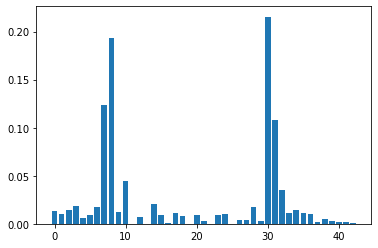

In [ ]:
from matplotlib import pyplot
importance=dt.feature_importances_
pyplot.bar([x for x in range(len(importance))],importance)
list(zip(importance,x_test.columns))

Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt')

In [22]:
rf_predict=rf.predict(X_test)
rf_predict

array([0, 0, 0, ..., 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


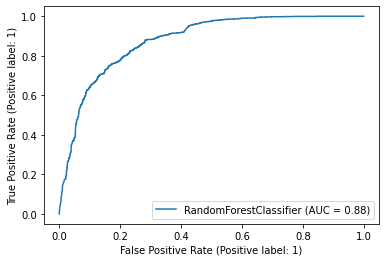

In [25]:
plot_roc_curve(rf,X_test,y_test)

In [26]:
rf_acc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("Test set auc random forest: {:.2f}".format(rf_acc))

Test set auc random forest: 0.88


0.88 is good auroc score.

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_test, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Contract_Month-to-month Importance: 0.14
Variable: Contract_Two year    Importance: 0.13
Variable: InternetService_Fiber optic Importance: 0.08
Variable: OnlineSecurity_Yes   Importance: 0.07
Variable: Tenure_period_1 - 12 Importance: 0.07
Variable: TechSupport_Yes      Importance: 0.05
Variable: Contract_One year    Importance: 0.05
Variable: OnlineSecurity_No    Importance: 0.04
Variable: OnlineBackup_No internet service Importance: 0.04
Variable: Tenure_period_61 - 72 Importance: 0.04
Variable: Dependents           Importance: 0.03
Variable: TotalCharges         Importance: 0.03
Variable: StreamingMovies_No internet service Importance: 0.03
Variable: Partner              Importance: 0.02
Variable: MonthlyCharges       Importance: 0.02
Variable: InternetService_No   Importance: 0.02
Variable: OnlineSecurity_No internet service Importance: 0.02
Variable: OnlineBackup_Yes     Importance: 0.02
Variable: DeviceProtection_No internet service Importance: 0.02
Variable: TechSuppor

Contract_Month-to-month has the highest feature importance in random forest.

In [28]:
feature_list = list(x.columns) #taking columns alone

In [29]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5] #taking one tree
export_graphviz(tree, out_file = 'tree.dot',feature_names = feature_list, rounded = True, precision = 1) #exporting image to dot file
(graph, ) = pydot.graph_from_dot_file('tree.dot') #to create graph
graph.write_png('tree.png');

XG Boost

In [33]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8356413484403413  Cross-Val score :  0.83060449354567
Learning rate :  0.02  Train score :  0.8450132885718282  Cross-Val score :  0.8423539205892148
Learning rate :  0.03  Train score :  0.8520072737445796  Cross-Val score :  0.8479473467708762
Learning rate :  0.04  Train score :  0.8577423415862359  Cross-Val score :  0.8543815008520891
Learning rate :  0.05  Train score :  0.8648762064624423  Cross-Val score :  0.8594176411823471
Learning rate :  0.06  Train score :  0.8678136802349979  Cross-Val score :  0.8616573622455975
Learning rate :  0.07  Train score :  0.8711707931179186  Cross-Val score :  0.8623562711798007
Learning rate :  0.08  Train score :  0.872849349559379  Cross-Val score :  0.8640347887406712
Learning rate :  0.09  Train score :  0.8743880262973842  Cross-Val score :  0.864595012830307
Learning rate :  0.1  Train score :  0.8738285074835641  Cross-Val score :  0.865433977786919
Learning rate :  0.11  Train score :  0.877185

learning rate=0.2 has the highest cross-val-score.

In [45]:
xg_pred=model.predict(X_test)
xg_pred

array([0, 0, 0, ..., 1, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


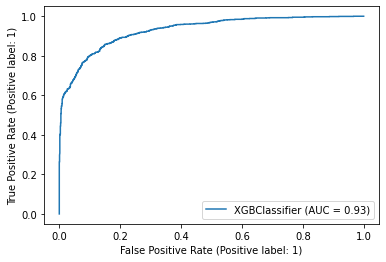

In [46]:
#evaluation
plot_roc_curve(model,X_test,y_test)

In [36]:
xgb_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("Test set auc xgb: {:.2f}".format(xgb_auc))

Test set auc xgb: 0.93


AUROC of XGB is 0.93.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


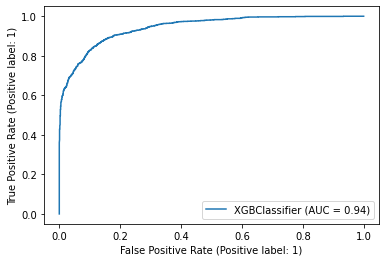

In [38]:
#construct model with the learning rate
models = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100)
models.fit(X_train,y_train)
plot_roc_curve(models,X_test,y_test)

#comparing models

1.   AUROC of XGB is 0.93.
2.   AUROC of Random forest is 0.88.
3.   AUROC of KNN is 0.93.
4.   AUROC of Decision tree is 0.83.
5.   AUROC of Logistic regression is 0.94.



Logistic regression model has the highest AUROC score.